In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

import matplotlib as mpl
import matplotlib.animation as animation

%matplotlib inline

In [2]:
## Let us load the data that we need

bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

mesh_mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mesh_mask['mbathy'][0,...]

Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.arange(230,350)
x_wcvi_slice = np.arange(550,650)

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


NEP_aug = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_aug.nc')


sal_aug = NEP_aug.variables['vosaline']
temp_aug = NEP_aug.variables['votemper']
spic_aug = NEP_aug.variables['spiciness']
rho_aug = NEP_aug.variables['density']

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


NEP_jul = nc.Dataset('/home/ssahu/saurav/NEP36_T_S_Spice_july.nc')


sal_jul  = NEP_jul.variables['vosaline']
temp_jul = NEP_jul.variables['votemper']
spic_jul = NEP_jul.variables['spiciness']
rho_jul = NEP_jul.variables['density']

NEP_jun = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/NEP36_T_S_Spice_june.nc')


sal_jun  = NEP_jun.variables['vosaline']
temp_jun = NEP_jun.variables['votemper']
spic_jun = NEP_jun.variables['spiciness']
rho_jun = NEP_jun.variables['density']


NEP_iso_jul = nc.Dataset('/home/ssahu/saurav/jul_along_iso.nc')

spic_iso_jul = NEP_iso_jul.variables['spiciness']
iso_t = NEP_iso_jul.variables['isot']

short_NEP_iso_jul = nc.Dataset('/home/ssahu/saurav/short_slice_NEP36_jul_along_isopycnal.nc')

short_spic_iso_jul = short_NEP_iso_jul.variables['spiciness']
short_iso_t = short_NEP_iso_jul.variables['isot']


short_NEP_iso_aug = nc.Dataset('/home/ssahu/saurav/short_NEP36_aug_along_isopycnal.nc')

short_spic_iso_aug = short_NEP_iso_aug.variables['spiciness']
short_iso_t = short_NEP_iso_aug.variables['isot']


short_NEP_iso_jun = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_june_along_isopycnal.nc')

short_spic_iso_jun = short_NEP_iso_jun.variables['spiciness']
short_iso_t = short_NEP_iso_jun.variables['isot']

In [7]:
## Define the function that we use to plot the spice along the isopycnals

def plot_iso_den(t, rho_0, month):
    
    
    if month == 'June':
    
        depth_rho_0 = np.zeros_like(sal_jun[0,0,...])

        SPICE_on_rho_0 = np.zeros_like(depth_rho_0)

        for j in np.arange(230,350):
            for i in np.arange(550,650):
                if mbathy[j,i] > 0:
                    depth_rho_0[j, i] = np.interp(rho_0, rho_jun[t,:mbathy[j, i], j, i]-1000, zlevels[:mbathy[j, i]])
                    
                    
        k = np.where(short_iso_t[:] == rho_0)
    
        spic_tzyx = short_spic_iso_jun[t,k[0],...]
        spic_tzyx[np.isnan(spic_tzyx)] = 0
        spic_iso = np.ma.masked_equal(spic_tzyx[0,...], 0)
    
    if month == 'July':
    
        depth_rho_0 = np.zeros_like(sal_jul[0,0,...])

        SPICE_on_rho_0 = np.zeros_like(depth_rho_0)

        for j in np.arange(230,350):
            for i in np.arange(550,650):
                if mbathy[j,i] > 0:
                    depth_rho_0[j, i] = np.interp(rho_0, rho_jul[t,:mbathy[j, i], j, i]-1000, zlevels[:mbathy[j, i]])
                    
                    
        k = np.where(short_iso_t[:] == rho_0)
    
        spic_tzyx = short_spic_iso_jul[t,k[0],...]
        spic_tzyx[np.isnan(spic_tzyx)] = 0
        spic_iso = np.ma.masked_equal(spic_tzyx[0,...], 0)
                    
    if month == 'August':
    
        depth_rho_0 = np.zeros_like(sal_aug[0,0,...])

        SPICE_on_rho_0 = np.zeros_like(depth_rho_0)

        for j in np.arange(230,350):
            for i in np.arange(550,650):
                if mbathy[j,i] > 0:
                    depth_rho_0[j, i] = np.interp(rho_0, rho_aug[t,:mbathy[j, i], j, i]-1000, zlevels[:mbathy[j, i]])

                    
        k = np.where(short_iso_t[:] == rho_0)
    
        spic_tzyx = short_spic_iso_aug[t,k[0],...]
        spic_tzyx[np.isnan(spic_tzyx)] = 0
        spic_iso = np.ma.masked_equal(spic_tzyx[0,...], 0)


#     norm = mpl.colors.Normalize(vmin=-0.4,vmax=-0.05)
    norm = mpl.colors.Normalize(vmin=-0.2,vmax=-0.05)


    plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
    plt.rcParams.update({'font.size':16})

    


    cmap = plt.get_cmap(cmo.cm.balance)
    cmap.set_bad('Burlywood')

    V_normalized = (spic_iso - spic_iso.min().min())
    V_normalized = V_normalized / V_normalized.max().max()
    spic_plot = V_normalized


    ls = LightSource(290, 35)
#     cmap1 = ls.shade(spic_iso, cmap=cmap, vert_exag=0.8, vmin=-0.4, vmax =-0.15, blend_mode='overlay')

    cmap1 = ls.shade(spic_iso, cmap=cmap, vert_exag=0.8, vmin=-0.2, vmax =-0.05, blend_mode='overlay')




    fig = plt.figure(figsize=(25, 20))
    ax = fig.gca(projection='3d')
    
    if month == 'June':
        
        ax.set_title('Spiciness on {0} June 2015, at isopycnal level of \u2248 {d:.2f} '.format(t+1, d=rho_0))
    
    if month == 'July':
        
        ax.set_title('Spiciness on {0} July 2015, at isopycnal level of \u2248 {d:.2f} '.format(t+1, d=rho_0))
        
    if month == 'August':
        
        ax.set_title('Spiciness on {0} August 2015, at isopycnal level of \u2248 {d:.2f} '.format(t+1, d=rho_0))
        
    X, Y = np.meshgrid(x_wcvi_slice[:],y_wcvi_slice[:])
    surf = ax.plot_surface(X, Y, -depth_rho_0[230:350,550:650], facecolors=cmap1,linewidth=0, antialiased=False, rstride=1, cstride=1)

    ax.set_aspect('auto')
    ax.view_init(35, 300) # elevation and azimuth

    ax.set_ylabel('Y index')
    ax.set_xlabel('X index')
    ax.set_zlabel('Depth (m)')
    m = cm.ScalarMappable(cmap=plt.get_cmap(cmo.cm.balance))
    m.set_array(spic_iso)
#     m.set_clim(-0.4, -0.05)
    m.set_clim(-0.2, -0.05)
    plt.colorbar(m)
    ax.set_aspect('auto')

    ax.view_init(35, 290) # elevation and azimuth

    ax.set_ylabel('Y index')
    ax.set_xlabel('X index')
    ax.set_zlabel('Depth (m)')

AttributeError: 'Poly3DCollection' object has no attribute 'set_data'

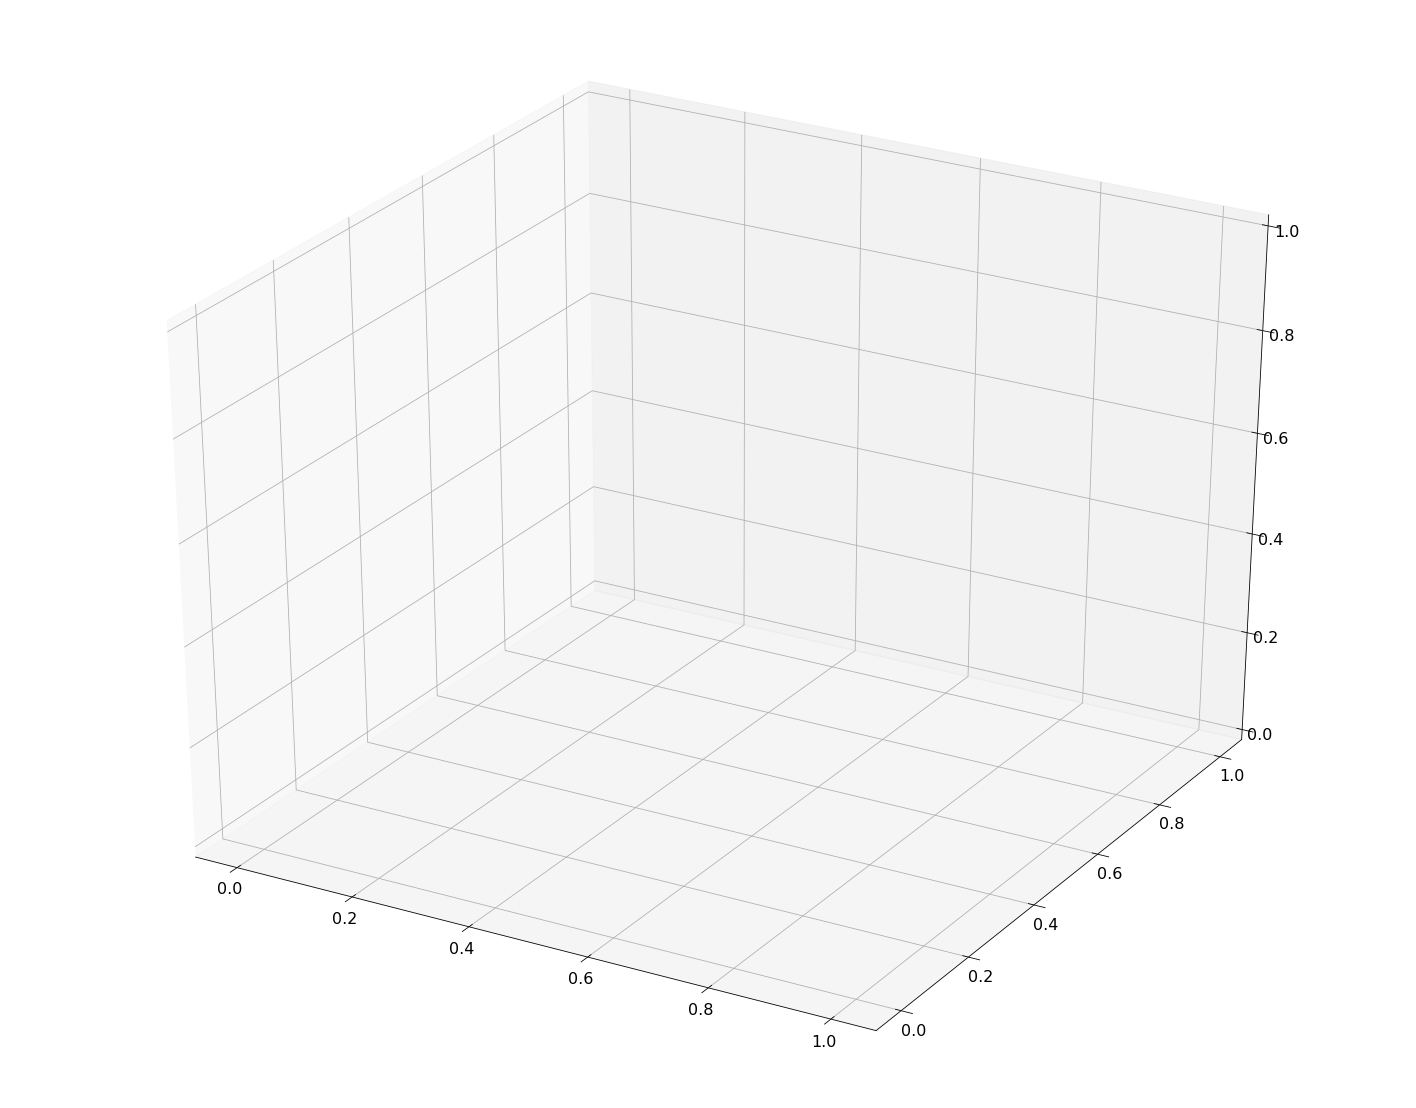

In [16]:
## Let us use a animate function now it is upto us really but let us at present make three videos one each for each month of June, July and August

##Define density Level which you would want to extract
rho_0 = 26.8

fig = plt.figure(figsize=(25, 20))
ax = fig.gca(projection='3d')

surf = ax.plot_surface([], [], [],linewidth=0, antialiased=False, rstride=1, cstride=1)


def init():
    surf.set_data([], [])
    return surf


def animate(t):
    print("Present step of iteartive argument is {0}".format(t))
    plot_iso_den(t, rho_0, 'June')
    
        


# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=1, bitrate=1000000, codec="libx264")

anim = animation.FuncAnimation(fig, animate, frames=2, init_func=init, blit=True)


mywriter = animation.FFMpegWriter(fps=1)


anim.save('/data/ssahu/NEP36_Extracted_Months/June.mp4',writer=writer)